## Lowell Tilt Current Meter Analyses


We will be analyzing the data from a month long deployment of a Lowell Tilt Current Meter: https://lowellinstruments.com/products/tcm-1-tilt-current-meter/. These meters were deployed at the boat ramp of Bog Stream in North Pond, Maine (44.647773, -69.865923) from Sept. 25th 2020 - Oct. 22, 2020 as part of a final project for GE 254 at Colby College in conjunction with the 7-lakes alliance (https://www.7lakesalliance.org/).


Created: Dr. Alejandra C. Ortiz
Date: Oct. 27, 2020


Learning Objectives: 
- Importing, analyzing, and visualizing time-series data
- Cleaning up raw data 
- Averaging burst data
- Exploring potential drivers of velocity changes at our site (meteorological)

Python skills: 
- learn how to import long-temporal data series
- learn how to utilize date-time objects in pandas to work FOR you in time-series analyses
- learn how to make more complicated plots in python: 2 y-axes or using color of markers to denote a 3rd variable


In [1]:
#Today's lab will take you through uploading, visualizing, and analyzing the tilt-current meter data. 
#you are expected to comment this script as useful, create your own version and use these data
#in your analysis for the final project.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Goal of this code:
1. Import TCM data
2. Visualize raw data
3. Burst average raw data
4. Clean up raw data
5. Re-visualize raw data

In [59]:
#read in the current meter data
data = pd.read_csv('Log2_GMS_Oct_(0)_CR.txt',header=0)

In [60]:
#convert to date-time
data.head()
data['DateTime'] = pd.to_datetime(data['ISO 8601 Time'])
data.head()

,ISO 8601 Time,Speed (cm/s),Bearing (degrees),Velocity-N (cm/s),Velocity-E (cm/s),DateTime
0,2020-09-25T10:00:00.000,41.86,126.87,-25.12,33.49,2020-09-25 10:00:00.000
1,2020-09-25T10:00:00.063,42.05,124.86,-24.04,34.51,2020-09-25 10:00:00.063
2,2020-09-25T10:00:00.125,41.68,126.58,-24.84,33.47,2020-09-25 10:00:00.125
3,2020-09-25T10:00:00.188,42.24,123.77,-23.48,35.11,2020-09-25 10:00:00.188
4,2020-09-25T10:00:00.250,41.86,126.14,-24.69,33.81,2020-09-25 10:00:00.250


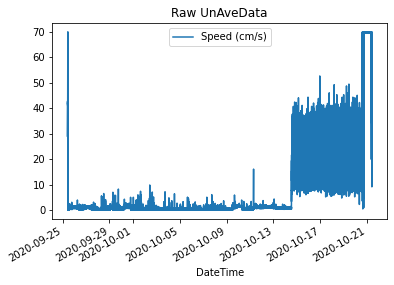

In [61]:
#let's just plot the raw data, speed & date-time
data.plot(x='DateTime',y='Speed (cm/s)',title='Raw UnAveData')

In [62]:
#option 1 - set date-time column as INDEX for dataframe instead of a column
data2 = data.set_index('DateTime')
data2.head()
print(data2.shape)
print(data.shape)
#how many columns are there in data2? How can you check column names?

(8985120, 5)
(8985120, 6)


In [64]:
#now let's remove pre-deployment & post-deployment
data2s = data2['2020-09-25 12:00:00':'2020-10-20 01:00:00']

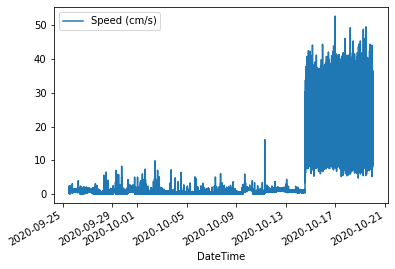

In [65]:
data2s.plot(y='Speed (cm/s)')

In [ ]:
#option 2 - subset without datetime as index
datas = data[(data['DateTime'] > '2020-09-25 11:00:00') & (data['DateTime'] < '2020-10-20 12:00:00')]
datas.plot(x = 'DateTime',y='Speed (cm/s)')

In [13]:
#same outcome - 2 different methods.

In [ ]:
#now let's average over each burst - first let's get a smaller subset to more easily 
#understand what is happening in our data

ds = data2s['2020-09-29 11:00:00':'2020-09-29 11:30:00']
#now plot this smaller data frame
print(ds.head())
ds.plot(y='Speed (cm/s)',style='.--')
#ok so now what do we see in the data?

In [ ]:
print(1/.0625)
#let's use resample to make this much easier! - we made burst measurements remember
ds_ave = ds.resample('30S').mean().dropna()
ax1 = ds.plot(y='Speed (cm/s)')
ds_ave.plot(y='Speed (cm/s)',color='green',ax = ax1)
#what are the differences between ds_ave & ds? does this make sense?

In [1]:
#now sometimes it is HELPFUL to have the index as datetime, othertimes it's helpful for this to be a column instead
#eg try and plot the above ds (unaveraged) as a SCATTER plot instead of a line plot

#so convert the index back to datetime
ds = ds.reset_index()
ds_ave = ds_ave.reset_index()
ds.head()

NameError: name 'ds' is not defined

In [ ]:
ds.head()

In [ ]:
#ok now let's apply this burst averaging to ALL the data
data_ave = data2s.resample('30S').mean().dropna()

In [36]:
data_ave
#why did I have dropna? what happens without that? Over what other resampling time period could I have averaged?

,Speed (cm/s),Bearing (degrees),Velocity-N (cm/s),Velocity-E (cm/s)
DateTime,,,,
2020-09-25 11:00:00,1.594792,167.614500,-1.551417,0.333396
2020-09-25 11:02:00,1.603000,167.595229,-1.560000,0.334354
2020-09-25 11:04:00,1.580812,167.529562,-1.538917,0.330208
2020-09-25 11:06:00,1.625146,167.270042,-1.580354,0.347917
2020-09-25 11:08:00,1.590125,167.725792,-1.549292,0.330333
...,...,...,...,...
2020-10-20 11:52:00,1.955437,103.303021,-0.454104,1.892646
2020-10-20 11:54:00,1.979687,102.158896,-0.424687,1.922146
2020-10-20 11:56:00,2.010458,101.535271,-0.408583,1.959042


(18031, 7)
(8654416, 5)


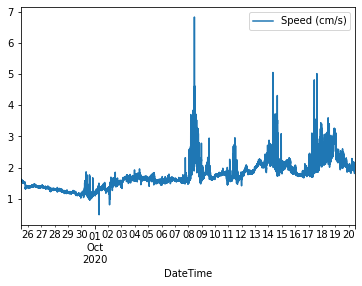

In [39]:
#now let's visualize the dataset again cleaned up
data_ave = data_ave.reset_index()
#go ahead and replot data_ave time-series of flow speed
data_ave.plot(x='DateTime',y='Speed (cm/s)')
print(data_ave.shape)
print(data2s.shape)

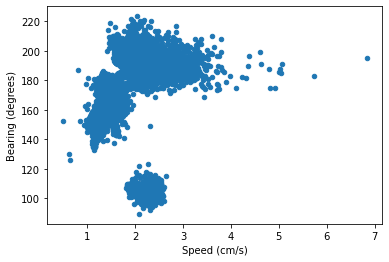

In [40]:
#so now what do we see? What can we change or investigate? What other things can we plot?
data_ave.plot(x='Speed (cm/s)',y='Bearing (degrees)',kind='scatter')

In [ ]:
#what is the above plot? What might this tell us? Are they ways we can make this plot more useful? 
#what is one downside to plotting bearing as a linear increasing value?

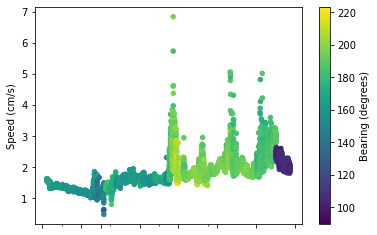

In [41]:
#how else can we analyze the flow magnitude AND DIRECTION?
#option 1 - scatter plot with color highlighting changes in magnitude
data_ave.plot(x='DateTime',y='Speed (cm/s)',kind='scatter',c='Bearing (degrees)',cmap='viridis')

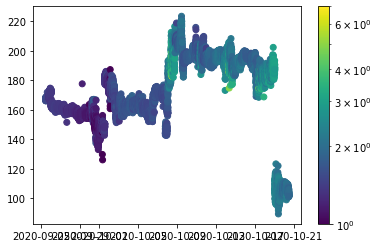

In [56]:
#option 2, look at how bearing changes with time
#so now plot a time-series of bearing where you set the color of scatter dots to be dependent on flow speed
import matplotlib.colors as colors

#data_ave.plot(x='DateTime',y='Bearing (degrees)',kind='scatter',c='Speed (cm/s)',cmap='viridis')
fig, ax = plt.subplots()
aa = ax.scatter(data_ave.DateTime,data_ave['Bearing (degrees)'],c=data_ave['Speed (cm/s)'],norm=colors.LogNorm(vmin=1,vmax=7))
fig.colorbar(aa, ax=ax)

In [ ]:
#option 3 --> rose plots
#check out the below code
# https://windrose.readthedocs.io/en/latest/usage.html
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

#now what is our direction? and what is our speed?
#2 methods:
ax = WindroseAxes.from_ax()
ax.bar(data_ave['Bearing (degrees)'], data_ave['Speed (cm/s)'], \
       normed=True, opening=0.9, edgecolor='white')
ax.set_legend()

In [ ]:
#or using pandas data frames more innately
#Mandatory:
#df: Pandas DataFrame with DateTimeIndex as index
from windrose import plot_windrose

d_ave = data_ave.set_index('DateTime')
plot_windrose(d_ave,var_name='Speed (cm/s)',direction_name = 'Bearing (degrees)',kind='bar',normed=True, \
             bins = np.arange(0,4,.5))
#what do we now see as trends?
#how can you change the binning of the flow speeds?
#what about changing the directional binning?

In [ ]:
#what's the rest of the data we have?

In [ ]:
# read in temp. data
temp = pd.read_csv('Log1_BogStream_Oct_(0)_T.txt',header=0)

In [ ]:
temp['DateTime'] = pd.to_datetime(temp['ISO 8601 Time'])

In [ ]:
temp = temp.set_index('DateTime')
#what am I doing here?

In [ ]:
temps = temp['2020-09-25 11:00:00':'2020-10-20 12:00:00']
#what does the above line create?
temps

In [ ]:
#let's go ahead and plot the time-series of temperature data

In [ ]:
#now let's plot everything together
ax1 = data_ave.plot(x='DateTime',y='Speed (cm/s)',legend=False)
temps = temps.reset_index()
ax2 = ax1.twinx()
temps.plot(secondary_y=True,x='DateTime',y='Temperature (C)',ax=ax2,color='black',legend=False)

In [ ]:
#now plotting with scatter, so I'm showing flow speed, direction, time, and temperature on ONE graph
fig, ax1 = plt.subplots()

plt.scatter(data_ave.DateTime,data_ave['Speed (cm/s)'],c = data_ave['Bearing (degrees)'],cmap='viridis')
plt.colorbar(orientation='horizontal',label='Direction (degs)', pad = 0.2)
ax2 = ax1.twinx()
ax2.plot(temps.DateTime,temps['Temperature (C)'],color='black')

ax1.set_ylabel('Speed (cm/s)')
ax1.set_xlabel('Date Time')
ax2.set_ylabel('Temperature (C)')


Don't forget to fix up all your plots: make sure they have LEGENDS (as needed), units, x & y labels (and colorbar labels),
and titles. And go ahead and save these figures.

In [1]:
#start thinking about how you can calculate the bed shear stress from the above dataset.
#how might these data correlate with precipitation events or other events
#are there trends in the data? Over time? how can you analyze these trends?
#what peaks exist in your data?

## <font color = green> Assignment 2: Weather Data </font> 

In [ ]:
#now let's look at the local meteorological data
weather = pd.read_csv('WeatherData_Norridgewock.txt',header=1,parse_dates=['Date'],\
                     date_parser=lambda x: pd.datetime.strptime(x, '%d-%b').replace(year=2020))
#ahh now what new thing was done here? 

In [ ]:
#let's look at this data!
weather = weather.set_index('Date')
weather

In [ ]:
weather.plot()
#what what just happened?
#how useful is this plot? Why might you use this? Why should you not use this?

In [ ]:
col = weather.columns
print(col)

In [ ]:
wsi = np.append(np.arange(1,14,3),15)
print(wsi)
col[wsi]
ws = weather[col[wsi]]
ws.head()
#now what am I doing?

In [ ]:
ws.columns = ['Temp (F)', 'Dew Pt (F)','Humidity (%)', 'Wind Speed (mph)','Pressure (hg)','Precip (in)']
ws.plot()
#is this more useful as a plot?

In [ ]:
#check your units! Time to make sure everything is in the SAME units (aka temperature, precip, etc)
#change everything to match units from tilt current meters


In [ ]:
#let's just look at our relevant data
#go ahead and set the index to the date-time object
#now subset ws to ONLY the dates you deployed the TCM

In [ ]:
#lets see how this looks with our data
ax1 = temps.plot(x='DateTime',y='Temperature (C)')
ws = ws.reset_index()
ws.plot(x='Date',y='Temp (C)',ax=ax1)

In [ ]:
#what else can we look at?
#go ahead and plot the average flow speed & average wind speed (think 2 y-axes)


In [ ]:
#what else can we look at?
#go ahead and plot the flow speed and precip data


Ok nice job filling out this code. Make sure you understand what is happening here. Go ahead and think about ways you can adapt this code to read in and analyze other data from the fieldtrip (like that bathymetry data or sediment data). 

Python scripts exist online for a whole host of things (pretty cool things).